<h1>Número de Empresas para o cálculo do TAM/SAM/SOM</h1>
<h3>Insper - Instituto de Ensino e Pesquisa , Graduação em Engenharia de Computação</h3>
<h4>Trabalho de Empreendedorismo Tecnológico - professor Luiz Alberto</h4>
<p style="font-weight: bold">Membros</p>

<h4>DataSet Escolhido</h4>

<p>An open sourced dataset of over 7+ Million Global Companies including company size, domains, location, and year founded.</p>
<p>Fonte:
<a href="https://data.world/peopledatalabs/free-7-million-company-dataset" style="text-decoration: none">
Data.World</a></p>

<p style="font-style: italic">Informações que esse Dataset possui</p></br>
<li>Nome da Empresa</li>
<li>Domínio (site oficial da empresa)</li>
<li>Ano de fundação da empresa</li>
<li>Indústria na qual a empresa participa (e.g.information technology and services, health): <a style="text-decoration:none" href="https://developer.linkedin.com/docs/reference/company-size-codes">industry</a> </li>
<li>Tamanho da Empresa em Número de Empregados: <a style="text-decoration:none" href="https://developer.linkedin.com/docs/reference/company-size-codes">size_range</a></li>
<li>Cidade da Sede Central da Empresa: <span style="font-style: italic">locality</span></li>
<li>País de Origem da Empresa: <span style="font-style: italic">country</span></li>
<li>Estimativa do Número de Empregados que a Empresa tem atualmente: <span style="font-style: italic">current employee estimate</span></li>
<li>Estimativa do Número de Empregados que a Empresa já teve: <span style="font-style: italic">total employee estimate</span></li>

<h4>Objetivos</h4>
<li>As empresas contidas no LinkedIn representam uma boa amostra dos possíveis clientes da IBM, uma vez que essa rede social é popular nos países que a IBM atua, conforme o gráfico abaixo:</li>

<h4>Bibliotecas</h4>

In [11]:
import pandas as pd
import numpy as np
import math as math
from scipy import stats

<h4>Lendo o Arquivo csv</h4>

In [12]:
#Criando o Dataframe
df = pd.read_csv("companies_sorted.csv")

In [13]:
len(df)

1048575

In [14]:
3990*6000*12/0.161

1784347826.0869565

In [15]:
len(df)*6000*12*0.42*0.23

7293048840.0

In [16]:
df.head(2)

,Unnamed: 0,name,domain,year founded,industry,size range,locality,country,linkedin url,current employee estimate,total employee estimate
0,5872184,ibm,ibm.com,1911.0,information technology and services,10001+,"new york, new york, united states",united states,linkedin.com/company/ibm,274047,716906
1,4425416,tata consultancy services,tcs.com,1968.0,information technology and services,10001+,"bombay, maharashtra, india",india,linkedin.com/company/tata-consultancy-services,190771,341369


In [17]:
df_brazil = df.loc[df.country=="brazil"]

In [18]:
df_brazil.head(2)

,Unnamed: 0,name,domain,year founded,industry,size range,locality,country,linkedin url,current employee estimate,total employee estimate
127,1704977,petrobras,petrobras.com.br,1953.0,oil & energy,10001+,"rio de janeiro, rio de janeiro, brazil",brazil,linkedin.com/company/petrobras,31454,51919
207,155797,vale,vale.com,1942.0,mining & metals,10001+,"rio de janeiro, rio de janeiro, brazil",brazil,linkedin.com/company/vale,21569,44516


<h4>Empresas Brasileiras por cidade</h4>

In [19]:
df_brazil['locality'].value_counts().head(5)

sao paulo, sao paulo, brazil               5812
rio de janeiro, rio de janeiro, brazil     1448
curitiba, parana, brazil                    821
belo horizonte, minas gerais, brazil        738
porto alegre, rio grande do sul, brazil     618
Name: locality, dtype: int64

<h4>Dividindo as industrias em Grupos</h4>

<p><a style="text-decoration: none" href="https://developer.linkedin.com/docs/reference/industry-codes#">Segundo fontes do próprio LinkedIn</a>, é possível dividir as indústrias em setores. Para respeitar a nomenclatura da fonte, iremos denominar os setores (finance, tech, legal, etc) por grupos:</p>
<li>corp</li>
<li>fin</li>
<li>man</li>
<li>tech</li>
<li>tran</li>
<li>leg</li>
<li>org</li>
<li>hlth</li>
<li>art</li>
<li>med</li>
<li>good</li>
<li>cons</li>
<li>rec</li>
<li>gov</li>
<li>rec</li>
<li>serv</li>
<li>agr</li>
<li>edu</li>


In [20]:
#Adicionando Planilha do LinkedIn relacionando as indústrias com áreas
sectors = pd.read_excel("Setores.xlsx")

In [21]:
sectors.head(3)

,Code,Groups,Description
0,47,"corp, fin",accounting
1,94,"man, tech, tran",airlines/aviation
2,120,"leg, org",alternative dispute resolution


<p>Como é possível ver acima, a coluna <span style="font-weight: bold">Description</span> refere-se a indústria, ao passo que <span style="font-weight: bold">Groups</span> é o setor(es) que a indústria pode participar</p>

<h4>Dividindo os Grupos</h4>

In [22]:
#Adicionando Planilha do LinkedIn relacionando as indústrias com áreas
sectors = sectors.set_index('Description')
areas = ['corp','fin','man','tech','tran','leg','org','hlth','art','med','good','cons','rec','gov','serv','agr','edu']
for area in areas:
    sectors[area] = 0
for industria in sectors.index:
    groups = sectors[sectors.index==industria]['Groups']
    for grupo in groups:
        grupo_split = grupo.split(", ")
        for area in grupo_split:
            sectors.loc[industria,area] = 1
sectors = sectors.drop(columns=["Code","Groups"])

In [23]:
sectors.head(5)

,corp,fin,man,tech,tran,leg,org,hlth,art,med,good,cons,rec,gov,serv,agr,edu
Description,,,,,,,,,,,,,,,,,
accounting,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
airlines/aviation,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
alternative dispute resolution,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
alternative medicine,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
animation,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0


In [24]:
df.head(5)

,Unnamed: 0,name,domain,year founded,industry,size range,locality,country,linkedin url,current employee estimate,total employee estimate
0,5872184,ibm,ibm.com,1911.0,information technology and services,10001+,"new york, new york, united states",united states,linkedin.com/company/ibm,274047,716906
1,4425416,tata consultancy services,tcs.com,1968.0,information technology and services,10001+,"bombay, maharashtra, india",india,linkedin.com/company/tata-consultancy-services,190771,341369
2,21074,accenture,accenture.com,1989.0,information technology and services,10001+,"dublin, dublin, ireland",ireland,linkedin.com/company/accenture,190689,455768
3,2309813,us army,goarmy.com,1800.0,military,10001+,"alexandria, virginia, united states",united states,linkedin.com/company/us-army,162163,445958
4,1558607,ey,ey.com,1989.0,accounting,10001+,"london, greater london, united kingdom",united kingdom,linkedin.com/company/ernstandyoung,158363,428960


<h4>Adicionando a classificação das empresas ao DataFrame Original</h4>

In [25]:
pd.set_option('display.max_columns', None)

In [26]:
df = df.join(sectors, on="industry")

In [27]:
df.head(2)

,Unnamed: 0,name,domain,year founded,industry,size range,locality,country,linkedin url,current employee estimate,total employee estimate,corp,fin,man,tech,tran,leg,org,hlth,art,med,good,cons,rec,gov,serv,agr,edu
0,5872184,ibm,ibm.com,1911.0,information technology and services,10001+,"new york, new york, united states",united states,linkedin.com/company/ibm,274047,716906,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4425416,tata consultancy services,tcs.com,1968.0,information technology and services,10001+,"bombay, maharashtra, india",india,linkedin.com/company/tata-consultancy-services,190771,341369,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
df = df.rename(columns={'corp':'Corporation','fin':'Financial ','man':'Manufacturing','tech':'Technology','tran':'Transportation','leg':'Legal','org':'CivicOrganization','hlth':'Health','art':'Art','med':'Media','good':'Goods','cons':'Construction','rec':'Recording','gov':'Government','serv':'SocialOrganization','agr':'Agriculture','edu':'Education'})

In [29]:
df =df.drop(['Unnamed: 0', 'name', 'domain','year founded','industry','size range','linkedin url','current employee estimate','total employee estimate','country'], axis=1)

In [30]:
df_sp = df.loc[df.locality == "sao paulo, sao paulo, brazil"]

In [31]:
df_sp = df_sp.drop(['locality'],axis=1)

In [32]:
df_sp.head(10)

,Corporation,Financial,Manufacturing,Technology,Transportation,Legal,CivicOrganization,Health,Art,Media,Goods,Construction,Recording,Government,SocialOrganization,Agriculture,Education
208,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
977,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1420,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [33]:
import matplotlib.pyplot as plt

In [34]:
df_solve_world = df.drop(['locality'],axis=1)

In [35]:
df_solve_world = df_solve_world.transpose().sum(axis = 1, skipna = True) 

In [37]:
serie_world = pd.Series(df_solve_world)

Text(0.5, 1.0, 'Distribuição das Empresas por Setor no Mundo (fonte: LinkedIn)')

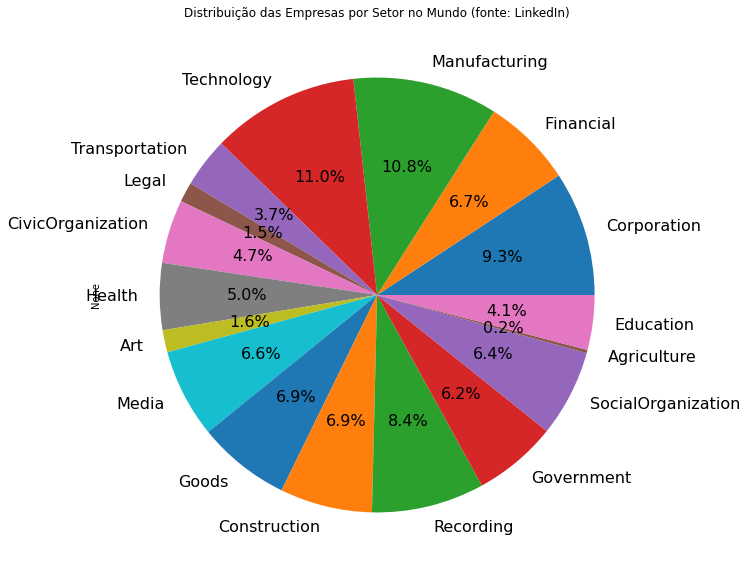

In [38]:
serie_world.plot.pie(figsize=(10, 10),subplots=True, fontsize=16,autopct='%1.1f%%')
plt.title("Distribuição das Empresas por Setor no Mundo (fonte: LinkedIn)")

In [39]:
media = 6.6
health = 3.2
legal = 2.7
financial = 6.3
goods = 6.2
tech = 14.2
top_sectors = media+health+legal+financial+goods+tech

In [40]:
print("número de empresas cadastradas válidas:{}".format(len(df)))

número de empresas cadastradas válidas:1048575


In [44]:
print("número de empresas cadastradas válidas:{}".format(int(len(df)*top_sectors/100)))

número de empresas cadastradas válidas:430964


In [45]:
print("número de empresas cadastradas que usam I.A.:{}".format(int(0.23*len(df)*top_sectors/100)))

número de empresas cadastradas que usam I.A.:99121


TAM: (todos os setores e todas as empresas), $ 75 497 400 000
SAM: (há 6 setores que mais utilizam IA), $30 953 934 000
SOM: (apenas 23% das empresas utilizam IA), $7 119 404 820